## Лабораторная работа. Знакомство с библиотеками для анализа данных

### О задании

Лабораторная работа направлена на работу с пакетами NumPy, Pandas и Matplotlib путём решения набора задач. В данном задании разрешено пользоваться только стандартной библиотекой языка Python, а также пакетами NumPy, Pandas и Matplotlib. Целью задания является редактирование данного jupyter notebook-a (в части блоков с кодом на python) таким образом, чтобы были реализованы указанные в задании функции.

### Знакомство с Numpy

Во всех заданиях данного раздела запрещено использовать циклы (ключевые слова *for* и *while*), [list comprehension](https://habrahabr.ru/post/30232/), [map и т.п.](http://pythonicway.com/python-functinal-programming)

Для каждой задачи приведите примеры использования реализованных функций.

Под матрицей в заданиях понимается двумерный [numpy.array](https://docs.scipy.org/doc/numpy/reference/generated/numpy.array.html)

In [1]:
import numpy as np

**(0.25 балла) Задание 1.** Реализуйте функцию, принимающую на вход матрицу ```X``` и два массива индексов ```indices1``` и ```indices2``` одинаковой длины и возвращающую np.array, состоящий из последовательности элементов 

```[X[indices1[0], indices2[0]], ... , X[indices1[N-1], indices2[N-1]]]```

In [54]:
def construct_array(X, indices1, indices2):
    return np.array(X[indices1[0:], indices2[0:]])

In [56]:
X = np.array([[3, 4],[5, 6]])
indices1 = np.array([0, 1]) 
indices2 = np.array([0, 1])
construct_array(X, indices1, indices2)

array([3, 6])

**(0.25 балла) Задача 2.** Реализуйте функцию, которая на вход принимает два массива ```X``` и ```Y``` (массивы могут быть n-мерные, но их размерности должны совпадать), а возвращает **True** если они равны и **False** - иначе.

In [27]:
def detect_identic(X, Y):
    return np.array_equal(np.size(X), np.size(Y))

In [28]:
X1 = np.array([[1, 2, 3],[5, 4, 2],[4, 2, 1]])
X2 = np.array([[1, 2, 5],[4, 5, 6],[1, 2]])
detect_identic(X1, X2)

False

**(0.25 балла) Задание 3.** Реализуйте функцию, которая на вход принимает цветное изображение ```X``` (трехмерный вектор размера (n, m, 3)) и возвращает среднее значение по трём каналам (вектор длины 3).

In [31]:
def mean_channel(X):
    return np.array([np.mean(X[0]), np.mean(X[1]), np.mean(X[2])])

In [36]:
X1 = np.array([[3, 3, 3], [9, 1, 0.5], [3]])
mean_channel(X1)

array([3. , 3.5, 3. ])

**(0.25 балла) Задание 4.** Реализуйте функцию, принимающую на вход матрицу ```X``` и некоторое число ```a``` и возвращающую ближайший к числу элемент матрицы.

Например, для ```X = np.arange(0,10).reshape((2, 5))``` и ```a = 3.6``` ответом будет 4.

In [67]:
def nearest_value(X, a):
    return np.abs(X - a).argmin()

In [72]:
X = np.arange(0,10).reshape((2,5)) 
nearest_value(X, 3.6)

4

**(0.5 балла) Задача 5.** Реализуйте функцию, принимающую на вход два одномерных массива ```x``` и ```y``` и возвращающую матрицу, в которой первый массив соответствует первому столбцу матрицы, второй - второму.

В этом задании **запрещается** пользоваться операцией транспонирования и рекомедуется воспользоваться методом [reshape](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.reshape.html).

In [150]:
def construct_matrix(x, y):
    return np.concatenate((np.reshape(x, (len(x),1)), np.reshape(y, (len(y),1))), axis=1)

In [151]:
X = [2, 2, 2]
Y = [4, 4, 4]
construct_matrix(X, Y)

array([[2, 4],
       [2, 4],
       [2, 4]])

**(0.5 балла) Задание 6.** Реализуйте функцию, которая на вход принимает вектор ```x```, содержащий целые числа, кроме 0, а возвращает вектор со вставленными нулями между числами.

Например, из ```[1, -5, 3]``` получить ```[1, 0, -5, 0, 3]```

In [372]:
def add_zeros(x):
    zer = np.zeros(2*len(x)-1, dtype=int)
    zer[::2] = x
    return zer

In [373]:
x1 = [1, -5, 3]
add_zeros(x1)

array([ 1,  0, -5,  0,  3])

**(0.75 балла) Задание 7.** Реализуйте функцию для подсчёта произведения ненулевых элементов на диагонали прямоугольной матрицы

Например, для ```X = np.array([[1, 0, 1], [2, 0, 2], [3, 0, 3], [4, 4, 4]])``` ответом является 3. Если ненулевых элементов нет, функция должна возвращать ```None```.

In [366]:
def nonzero_product(X):
    dig = np.diagonal(X, offset=0)
    if np.count_nonzero(dig) == len(dig):
        return None
    else:
        return np.prod(dig[dig!=0])

In [367]:
X = np.array([[1, 0, 1], [2, 1, 2], [3, 0, 3], [4, 4, 4]])
nonzero_product(X)

In [368]:
X = np.array([[1, 0, 1], [2, 0, 2], [3, 0, 3], [4, 4, 4]])
nonzero_product(X)

3

**(0.75 балла) Задание 8.** Реализуйте функцию, возвращающую максимальный элемент в массиве ```X``` среди элементов, перед которыми стоит нулевой.

Например, для ```X = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0])``` ответом является 5. Если подходящих элементов нет, функция должна возвращать ```None```.

In [160]:
def max_element(X):
    if np.count_nonzero(X) == len(X):
        return None
    else:
        num_bef_null = np.where(X==0)[0] + 1
        if max(num_bef_null) == len(X):
            return max(X[num_bef_null[0:-1]])
        return max(X[num_bef_null])

In [161]:
X = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0])
max_element(X)

5

**(0.75 балла) Задание 9.** Реализуйте функцию, принимающую на вход матрицу ```X``` и возвращающую все её уникальные строки в виде матрицы.

In [174]:
def get_unique_rows(X):
    return np.unique(X, axis=0)

In [180]:
X = np.array([[14, 9],[15, 25],[14, 8]])
get_unique_rows(X)

array([[14,  8],
       [14,  9],
       [15, 25]])

In [181]:
X = np.array([[14, 9],[15, 25],[14, 9]])
get_unique_rows(X)

array([[14,  9],
       [15, 25]])

**(0.75 балла) Задача 10.** Реализуйте функцию, каторая во входной вещественной матрице ```X``` находит все значения ```nan``` и заменяет их на среднее арифметическое всех остальных элементов. Если все элементы матрицы ```nan```, то верните нулевую матрицу той же размерности.

In [287]:
def replace_nans(X):
    if np.all(np.isnan(X)) == True:
        return np.zeros(np.shape(X))
    else:
        mask = np.isnan(X)
        X = np.ma.masked_array(X, mask)
        return masked_arr.filled(np.mean(X))

In [288]:
X = np.array([[np.nan, np.nan],[np.nan, np.nan]])
replace_nans(X)

array([[0., 0.],
       [0., 0.]])

In [289]:
X = np.array([[1, np.nan],[2, 3]])
replace_nans(X)

array([[1., 2.],
       [3., 4.]])

**(1 балл) Задача 11.** Напишите функцию, генерирующую [матрицу Вандермонда](https://ru.wikipedia.org/wiki/Определитель_Вандермонда), принемающую на вход вектор $(x_1, ... , x_n)$.

В этом задании **запрещается** пользоваться готовыми реализациями (например, [numpy.vander](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.vander.html)), а также [np.repeat](https://docs.scipy.org/doc/numpy/reference/generated/numpy.repeat.html) и [np.transpose](https://docs.scipy.org/doc/numpy/reference/generated/numpy.transpose.html).

При решение задействуйте [np.reshape](https://docs.scipy.org/doc/numpy/reference/generated/numpy.reshape.html) и/или [np.newaxis](https://docs.scipy.org/doc/numpy-1.13.0/reference/arrays.indexing.html).

In [311]:
def vander(x):
    n = len(x)
    if n == 1:
        return x**0 
    def rec_van(x, n):
        if n == 1:
            return x**0
        else:
            return np.column_stack([x**(n-1), rec_van(x, n-1)])
    return np.column_stack([x**(n-1), rec_van(x, n-1)])

In [313]:
x = np.array([1, 2, 3, 4])
vander(x) ## Результат, полученный с помощью фукнции vander

array([[ 1,  1,  1,  1],
       [ 8,  4,  2,  1],
       [27,  9,  3,  1],
       [64, 16,  4,  1]], dtype=int32)

In [314]:
x = np.array([1, 2, 3, 4])
np.vander(x) ## Результат, полученный с помощью np.vander

array([[ 1,  1,  1,  1],
       [ 8,  4,  2,  1],
       [27,  9,  3,  1],
       [64, 16,  4,  1]])

**(1 балл) Задача 12.** Даны две вещественные матрицы ```X``` и ```Y``` с одинаковым числом столбцов и, в общем случае, различным числом строк. Необходимо реализовать функцию, вычисляющую матрицу попарных [косинусных коэффициентов](https://en.wikipedia.org/wiki/Cosine_similarity) между всеми $X_i и Y_j$, где $X_i$ - $i$-ая строка матрицы $X$, а $Y_j$ - $j$-ая строка матрицы $Y$. 

В этом задании **запрещается** пользоваться готовыми реализациями, а также [np.repeat](https://docs.scipy.org/doc/numpy/reference/generated/numpy.repeat.html) и [np.transpose](https://docs.scipy.org/doc/numpy/reference/generated/numpy.transpose.html).

При решение задействуйте [np.reshape](https://docs.scipy.org/doc/numpy/reference/generated/numpy.reshape.html) и/или [np.newaxis](https://docs.scipy.org/doc/numpy-1.13.0/reference/arrays.indexing.html), [np.sqrt](https://docs.scipy.org/doc/numpy/reference/generated/numpy.sqrt.html), [np.sum](https://docs.scipy.org/doc/numpy/reference/generated/numpy.sum.html) и [np.power](https://docs.scipy.org/doc/numpy/reference/generated/numpy.power.html).

In [ ]:
# Your code here

**(1 балл) Задача 13.** Написать функцию, которая получает на вход матрицу и масштабирует каждый её столбец, а именно вычитает из столбца его среднее значение и делит столбец на стандартное отклонение.

Для тестирования можно сгенерировать с помощью метода [numpy.random.randint](https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.randint.html) случайную матрицу и проверить на ней работу метода.

Убедитесь, что в функции не будет происходить деления на ноль, если происходит деление на ноль, то верните **None**.

In [167]:
def scale(X):
    Shp = X.shape[1]-1
    def rec_scale(X, Shp):
        if np.std(X, axis=0)[Shp] == 0:
            return None
        elif Shp == 0:
            return (X[:,Shp] - np.mean(X, axis=0)[0])/np.std(X, axis=0)[0]
        else:
            return np.column_stack([(X[:,Shp] - np.mean(X, axis=0)[Shp])/np.std(X, axis=0)[Shp], rec_scale(X, Shp-1)])
    return np.column_stack([(X[:,Shp] - np.mean(X, axis=0)[Shp])/np.std(X, axis=0)[Shp], rec_scale(X, Shp-1)])

In [168]:
X = np.array([[1, 2, 3],[9, 9, 9]])
scale(X)

array([[-1., -1., -1.],
       [ 1.,  1.,  1.]])

In [170]:
X = np.random.randint(0, 50, size = (2, 3))
print(X), scale(X)

[[27 43  4]
 [ 9 10 44]]


(None,
 array([[-1.,  1.,  1.],
        [ 1., -1., -1.]]))

**(1 балл) Задача 14.** Пусть $N=1000$. Повторите $N$ раз следующий эксперимент: сгенерируйте две матрицы размера $N×N$ из стандартного нормального распределения, перемножьте их (как матрицы) и найдите максимальный элемент. Какое среднее значение по экспериментам у максимальных элементов? 95-процентная квантиль? 

При решение задачи для повторения экспериментов воспользуйтесь [list comprehension](https://habrahabr.ru/post/30232/), а также [tqdm_notebook](https://habrahabr.ru/post/276725/) - для отслеживания прогресса.

In [2]:
def create_matrix(N):
    #mat_max = np.empty([1, N])
    mat1 = [np.random.normal(size=(x, x)) for x in np.arange(N)]
    mat2 = [np.random.normal(size=(x, x)) for x in np.arange(N)]
    mat_max = [np.max([np.dot(mat1[x], mat2[x]) for x in np.arange(1,N)][x]) for x in np.arange(N-1)]
    #print(mat_max)
    return np.mean(mat_max), np.quantile(mat_max, q=0.95)

In [3]:
create_matrix(5)

(2.927016290462541, 8.290466946902686)

In [5]:
import time
from tqdm.notebook import tqdm as log_progress

start_time = time.time()
for url in log_progress(create_matrix(200)):
    print(url)
print("%s seconds " % (time.time() - start_time))

# Тысячу не поставил, так как он с 1000 завис, поэтому, как пример, поставил 200

37.10204700737329
58.534490279045656

17.45241904258728 seconds 


### Аналитика данных с Pandas 

![](https://metrouk2.files.wordpress.com/2015/10/panda.jpg)

Загрузите таблицу с данными из ```articles.csv```. Удалите записи, в которых присутствуют пропуски.


**(0.5 балла) Задача 15.** Проделайте следующие базовые операции с датафреймами:

1. определите количество различных издательств в таблице;
2. найдите количество опубликованных статей в отрезке [2016-06-01, 2016-12-31];
3. посчитайте распределение статей автора *Tom Ciccotta* по годам;
4. найдите месяц, в котором было наибольшее число статей;
5. выпишите 3 первые статьи автора *John Hayward* в 2016 году.

In [6]:
import pandas as pd

In [7]:
df = pd.read_csv('articles.csv')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           50000 non-null  int64 
 1   title        50000 non-null  object
 2   publication  50000 non-null  object
 3   author       43694 non-null  object
 4   date         50000 non-null  object
 5   year         50000 non-null  int64 
 6   month        50000 non-null  int64 
 7   content      50000 non-null  object
dtypes: int64(3), object(5)
memory usage: 3.1+ MB


In [9]:
df.dropna(inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43694 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           43694 non-null  int64 
 1   title        43694 non-null  object
 2   publication  43694 non-null  object
 3   author       43694 non-null  object
 4   date         43694 non-null  object
 5   year         43694 non-null  int64 
 6   month        43694 non-null  int64 
 7   content      43694 non-null  object
dtypes: int64(3), object(5)
memory usage: 3.0+ MB


In [11]:
df.head(3)

id                                              title     publication  \
0  17283  House Republicans Fret About Winning Their Hea...  New York Times   
1  17284  Rift Between Officers and Residents as Killing...  New York Times   
2  17285  Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial ...  New York Times   

                          author        date  year  month  \
0                     Carl Hulse  2016-12-31  2016     12   
1  Benjamin Mueller and Al Baker  2017-06-19  2017      6   
2                   Margalit Fox  2017-01-06  2017      1   

                                             content  
0  WASHINGTON  —   Congressional Republicans have...  
1  After the bullet shells get counted, the blood...  
2  When Walt Disney’s “Bambi” opened in 1942, cri...

In [12]:
# определите количество различных издательств в таблице;
df['publication'].nunique()

5

In [13]:
# найдите количество опубликованных статей в отрезке [2016-06-01, 2016-12-31]
# Your code here];
df.query("'2016-06-01' <= date < '2016-12-31'")

id                                              title  \
2536   20116  The Battle Over the Sea-Monkey Fortune - The N...   
2539   20119  Reaching Peak Greek at the Met Museum - The Ne...   
2545   20125  As China’s Growth Slows, Banks Feel the Strain...   
2546   20126  Pope Francis Takes 12 Refugees Back to Vatican...   
2547   20127  U.S. Plans to Step Up Military Campaign Agains...   
...      ...                                                ...   
49847  73224        Will the Alabama Crimson Tide Keep Rolling?   
49848  73225                      Embracing an Ordinary Economy   
49849  73226  2016: A Year Defined by America’s Diverging Ec...   
49850  73227                  The Year in Religion and Politics   
49851  73228  Will Law Enforcement Support Trump’s Immigrati...   

          publication                               author        date  year  \
2536   New York Times                            Jack Hitt  2016-09-10  2016   
2539   New York Times                       Holland Cotter  2016-07-13  2016   
2545   New York Times                           Neil Gough  2016-09-02  2016   
2546   New York Times                          Jim Yardley  2016-09-02  2016   
2547   New York Times  Michael S. Schmidt and Eric Schmitt  2016-12-21  2016   
...               ...                                  ...         ...   ...   
49847        Atlantic                     Robert O'Connell  2016-12-30  2016   
49848        Atlantic            Alexia Fernández Campbell  2016-12-30  2016   
49849        Atlantic                         Annie Lowrey  2016-12-30  2016   
49850        Atlantic                      Candice Norwood  2016-12-30  2016   
49851        Atlantic                    Priscilla Alvarez  2016-12-30  2016   

       month                                            content  
2536       9  The way the lawyer William Timmons described t...  
2539       7  Seen from on high, history is a grand sorting ...  
2545       9  HONG KONG  —   For Chinese banks, the decision...  
2546       9  MYTILENE, Greece  —   Pope Francis made an emo...  
2547      12  ABU DHABI, United Arab Emirates  —   The Obama...  
...      ...                                                ...  
49847     12  Minutes into an   game against Texas AM, the U...  
49848     12  In the past half century, many politicians hav...  
49849     12  In many ways, 2016 has been the strongest year...  
49850     12  Every December, The Atlantic looks back on the...  
49851     12  In an interview with 60 Minutes last month,   ...  

[17103 rows x 8 columns]

In [14]:
# посчитайте распределение статей автора Tom Ciccotta по годам;
df.loc[df['author'] == 'Tom Ciccotta'].groupby('year').count()

id  title  publication  author  date  month  content
year                                                       
2016  124    124          124     124   124    124      124
2017  132    132          132     132   132    132      132

In [15]:
# найдите месяц, в котором было наибольшее число статей; 
## sort_values(by=['id']).head(3) sort_values(by ='id', ascending='True').max(axis=1).tail(3)
df.groupby('month').count().sort_values(by=['month']).head(3)

id  title  publication  author  date  year  content
month                                                       
1      5235   5235         5235    5235  5235  5235     5235
2      4678   4678         4678    4678  4678  4678     4678
3      5138   5138         5138    5138  5138  5138     5138

In [16]:
# выпишите 3 первые статьи автора John Hayward в 2016 году.
df.loc[(df['author'] == 'John Hayward')].query("'2016-01'<= date <'2016-02'").sort_values(by=['date']).head(3)

id                                              title publication  \
22041  40791  Islamic State Claims Credit For Gun Attack On ...   Breitbart   
16861  35600  Indonesian Couple Beaten with Canes for Violat...   Breitbart   
27922  46688  Mark Zuckerberg Wants a Robot Butler Like Tony...   Breitbart   

             author        date  year  month  \
22041  John Hayward  2016-01-01  2016      1   
16861  John Hayward  2016-01-01  2016      1   
27922  John Hayward  2016-01-04  2016      1   

                                                 content  
22041  The Islamic State has claimed responsibility f...  
16861  Islamic sharia law was enforced with canes onc...  
27922  Facebook founder and CEO Mark Zuckerberg’s New...

**Работа со строками в датафрейме.**

Для датафреймов существуют методы работы со строковыми данными. Чтобы применить их, необходимо воспользоваться атрибутом ```str```, после чего вызвать нужные методы работы со строками. Например, вызов:

```df['content'].str.len() ```

подсчитает для каждой строчки в датафрейме количество символов в колонке content. Более подробную информацию про работу с текстовыми данными в Pandas можно найти [здесь](https://pandas.pydata.org/pandas-docs/stable/user_guide/text.html).


**(0.5 балла) Задача 16.**

Найдите в датафрейме всех авторов, имя которых содержит Faith. Выведите Series, состоящий из всех таких уникальных имен.

In [17]:
# Your code here
Auth_Faith = df['author'].str.extract(pat = '(Faith.)', expand=False).dropna().index 
Faith_series = df.loc[Auth_Faith]['author']
print(Faith_series)

32105     Faith Haleh Robinson
32787             Faith Karimi
32966             Faith Karimi
33211             Faith Karimi
33222             Faith Karimi
                 ...          
42438             Faith Karimi
42440             Faith Karimi
42493             Faith Karimi
42498             Faith Karimi
42933             Faith Karimi
Name: author, Length: 90, dtype: object


**(1 балл) Задача 17.**

Как можно заметить, в таблице существует множество различных написаний имени Faith Karimi. В основном эти написания различаются пунктуацией - лишние пробелы и запятые. Для правильного подсчета статистик для текстовых данных зачастую возникает необходимость в их предобработке.

Проведите следующие преобразования для колонок *author* и *content*:

1. приведение текста к нижнему регистру;

2. удаление всей пунктуации из текста;

3. удаление пробелов в начале и конце строки;

3. замена подряд идущих пробелов одним пробелом.

Например, строка ```"   It's 6 a.m. and I'm still doing this homework :((    "```

преобразуется в строку  ```its 6 am and im still doing this homework```

Подсчитайте статистику для имени Faith из прошлого задания. Проверьте, что теперь различные способы написания «схлопываются» в один.

In [18]:
## import warnings
## warnings.filterwarnings("ignore")

# Your code here
df_punct = df[['author', 'content']]
df_punct['author'], df_punct['content']  = df_punct['author'].str.lower(), df_punct['content'].str.lower()

df_punct['content'] = df_punct['content'].str.replace(r'[^\w\s]+', '')
df_punct['author'] = df_punct['author'].str.replace(r'[^\w\s]+', '')

df_punct['content'] = df_punct['content'].str.strip()
df_punct['author'] = df_punct['author'].str.strip()

df_punct['content'] = df_punct['content'].str.replace(r'  ', '')
df_punct['author'] = df_punct['author'].str.replace(r'  ', '')

df_punct.head()

C:\Users\Dmitriy.ASUS\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Dmitriy.ASUS\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Dmitriy.ASUS\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:

author  \
0                     carl hulse   
1  benjamin mueller and al baker   
2                   margalit fox   
3               william mcdonald   
4                   choe sanghun   

                                             content  
0  washington congressional republicans have a ne...  
1  after the bullet shells get counted the blood ...  
2  when walt disneys bambi opened in 1942 critics...  
3  death may be the great equalizer but it isnt n...  
4  seoul south korea north koreas leader kim said...

In [19]:
# Подсчитайте статистику для имени Faith из прошлого задания. 
# Проверьте, что теперь различные способы написания «схлопываются» в один.

# Your code here

Auth_Faith_n = df_punct['author'].str.extract(pat = '(faith.)', expand=False).dropna().index 
Faith_series_n = df.loc[Auth_Faith_n]['author']
print(Faith_series_n)


32105     Faith Haleh Robinson
32787             Faith Karimi
32966             Faith Karimi
33211             Faith Karimi
33222             Faith Karimi
                 ...          
42438             Faith Karimi
42440             Faith Karimi
42493             Faith Karimi
42498             Faith Karimi
42933             Faith Karimi
Name: author, Length: 90, dtype: object


**Группировка данных**

С помощью метода [groupby](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html) удобно группировать данные по значениям одной или нескольких колонок. Далее можно вычислять различные статистики для каждой группы по отдельности.

**(1 балл) Задача 18.**

Выведите для каждого автора максимальное количество публикаций за календарный год (колонка year), а также сам год, на котором достигается этот максимум. Выведите топ-20 строк в порядке убывания количества публикаций.

Пример:

Василий Пупкин написал 3 статьи в 2016, и 4 в 2017, а его брат Иван Пупкин только 1 статью в 2016, а в 2017 он отправился в армию и статей не писал.

Необходимо вывести

```
Василий Пупкин - 2017 - 4
Иван Пупкин    - 2016 - 1
```

Обратите внимание, что несколько вызовов методов над датафреймами можно объединить в один pipeline. Другими словами, можно писать

```
df.func1().func2().funс3()
```

По возможности реализуйте требуемую функцию с помощью **одного** такого пайплайна. Делайте переносы для лучшей читаемости кода.

In [33]:
# Your code here
df[['author','year','title']].groupby(['author','year']).size().sort_values(ascending=False).head(20)

author              year
Breitbart News      2016    1317
Pam Key             2016     820
Charlie Spiering    2016     660
Alex Swoyer         2016     584
Daniel Nussbaum     2016     532
AWR Hawkins         2016     525
John Hayward        2016     521
Jerome Hudson       2016     482
Pam Key             2017     457
Ian Hanchett        2016     429
Joel B. Pollak      2016     417
Jeff Poor           2016     323
Jerome Hudson       2017     323
Warner Todd Huston  2016     316
Trent Baker         2016     280
Charlie Spiering    2017     268
Patrick Howley      2016     259
Breitbart London    2016     258
Frances Martel      2016     257
Charlie Nash        2016     254
dtype: int64

**(1 балл) Задача 19.**
Для каждой статьи $i$ исходного датафрейма посчитайте количество статей, опубликованных тем же издательством (publication), к моменту публикации $i$ (включая статьи того же дня).

Обратите внимание, что для всех статей, выпущенных одним издательством в один день, должен получиться одинаковый ответ.

**Hint**. Возможный вариант решения:

1. сгруппировав данные по полям *publication*, *date*, посчитать размер каждой группы;
2. приджойнить размер группы к основному датафрейму с помощью функуии ```pd.merge```.

In [64]:
publication_date = pd.DataFrame({'publication_by_day': df.groupby(['publication','date']).size()}).reset_index()
pd.merge(df, publication_date, how='outer')

id                                              title  \
0      17283  House Republicans Fret About Winning Their Hea...   
1      17291  First, a Mixtape. Then a Romance. - The New Yo...   
2      17292  Calling on Angels While Enduring the Trials of...   
3      24819  Pan Pan, Father to a Generation of Pandas, Die...   
4      17284  Rift Between Officers and Residents as Killing...   
...      ...                                                ...   
43689  73454           The Enduring Mystery of Pain Measurement   
43690  73455    What Conan O’Brien Means to Late Night’s Future   
43691  73456  The Absurdity of Attacking Celebrities to Defe...   
43692  73457  Drive-Through Redwoods Are Monuments to Violen...   
43693  73458  How Superstar Economics Is Killing the NFL’s R...   

          publication                         author        date  year  month  \
0      New York Times                     Carl Hulse  2016-12-31  2016     12   
1      New York Times               Katherine Rosman  2016-12-31  2016     12   
2      New York Times                    Andy Newman  2016-12-31  2016     12   
3      New York Times                    Erin McCann  2016-12-31  2016     12   
4      New York Times  Benjamin Mueller and Al Baker  2017-06-19  2017      6   
...               ...                            ...         ...   ...    ...   
43689        Atlantic                    John Walsh   2017-01-10  2017      1   
43690        Atlantic                     David Sims  2017-01-10  2017      1   
43691        Atlantic             Conor Friedersdorf  2017-01-10  2017      1   
43692        Atlantic                    Sarah Zhang  2017-01-10  2017      1   
43693        Atlantic                 Derek Thompson  2017-01-10  2017      1   

                                                 content  publication_by_day  
0      WASHINGTON  —   Congressional Republicans have...                   4  
1      Just how   is Hillary Kerr, the    founder of ...                   4  
2      Angels are everywhere in the Muñiz family’s ap...                   4  
3      Pan Pan, a giant panda whose virility helped s...                   4  
4      After the bullet shells get counted, the blood...                   6  
...                                                  ...                 ...  
43689  One night in May, my wife sat up in bed and sa...                  19  
43690  Conan O’Brien was once the upstart of the   co...                  19  
43691  Fifty years ago, California Republicans electe...                  19  
43692  This weekend, amidst a torrent of rain, one of...                  19  
43693  For years the National Football League has bee...                  19  

[43694 rows x 9 columns]

### Визуализация

Обратите внимание, что у графиков должны быть подписаны оси, заголовок графика и при необходимости обязательно наличие легенды. За отсутствие названий графиков и подписей к осям могут снижаться баллы. Все картинки должны быть самодостаточны и визуально удобны для восприятия, так чтобы не нужно было смотреть ваш код или знать задание, чтобы понять что на них изображено.

![](https://imgs.xkcd.com/comics/convincing.png)

**(0.5 балла) Задача 20.** Используя функцию ```gen_uncertain_data``` для генерации выборки, отобразите на графике синим цветом функцию ```y(x)```, а также ее доверительный интервал в виде закрашенной зеленым цветом области от ```y[i] - error[i]``` до ```y[i] + error[i]```. Полезной может оказаться функция fill_between.

    def gen_uncertain_data():
        x = np.linspace(0, 30, 100)
        y = np.sin(x/6*np.pi) + np.random.normal(0, 0.02, size=x.shape)
        error = np.random.normal(0.1, 0.02, size=y.shape)
        return x, y, error

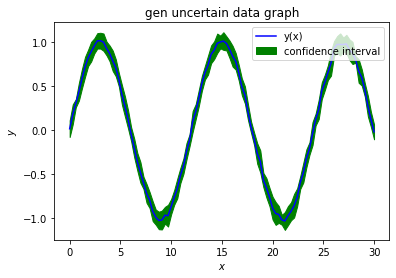

In [162]:
import matplotlib.pyplot as plt


def gen_uncertain_data():
    x = np.linspace(0, 30, 100)
    y = np.sin(x/6*np.pi) + np.random.normal(0, 0.02, size=x.shape)
    error = np.random.normal(0.1, 0.02, size=y.shape)
    return x, y, error


x = gen_uncertain_data()[0]
y = gen_uncertain_data()[1]
error = gen_uncertain_data()[2]


plt.plot(x, y, color='blue', label='y(x)')
plt.title("gen uncertain data graph")
plt.fill_between(x, y - error, y + error, color='green', label ='confidence interval')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend(loc=1)
plt.show()

**(0.5 балла) Задача 21.** Bизуализируйте соотношение различных издательств, используя [pie plot](http://pandas.pydata.org/pandas-docs/stable/visualization.html#visualization-pie).


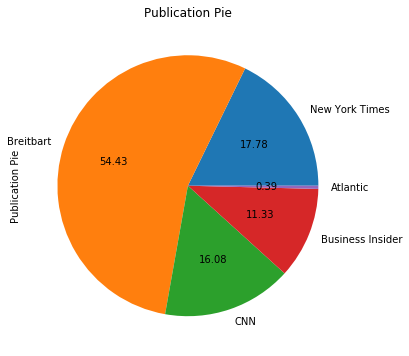

In [327]:
# Your code here
numb = df.groupby(['publication']).size()
indexies = df['publication'].unique()
series = pd.Series(numb, index=indexies, name='Publication Pie')
plt.title('Publication Pie')
series.plot.pie(figsize=(6, 6), autopct='%.2f');

**(0.5 балла) Задача 22.** Постройте распределение количества публикаций каждого издания по каждому году, используя [bar plot](http://pandas.pydata.org/pandas-docs/stable/visualization.html#visualization-barplot). В какой год было больше всего публикаций?

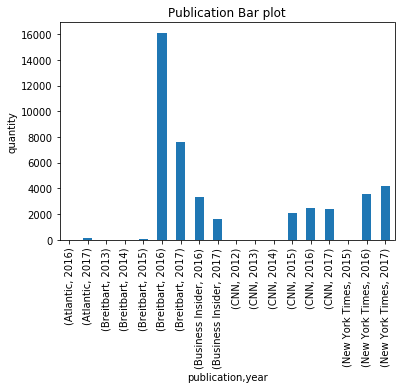

In [326]:
# Your code here
plt.title('Publication Bar plot')
plt.ylabel('quantity')
df.groupby(['publication','year']).size().plot.bar();

**(0.5 балла) Задача 23.** Изобразите распределение длин заголовков (*title*) статей для каждого издательства. Для этого можно воспользоваться, например, функцией [sns.violinplot](https://seaborn.pydata.org/generated/seaborn.violinplot.html).

C:\Users\Dmitriy.ASUS\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


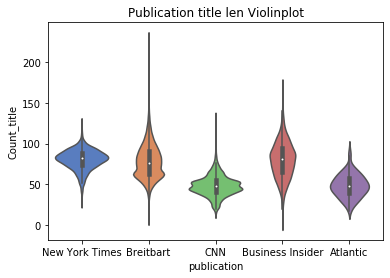

In [171]:
# Your code here
import seaborn as sns


df1 = df[['publication', 'title']]
df1['Count_title'] = df1['title'].str.len()

target = ('publication','Count_title')
values = df1.loc[:, target].copy()
plt.title('Publication title len Violinplot')
sns.violinplot(x="publication", y="Count_title", data=values, palette="muted");
#df1[['publication','Count_title']]